In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']

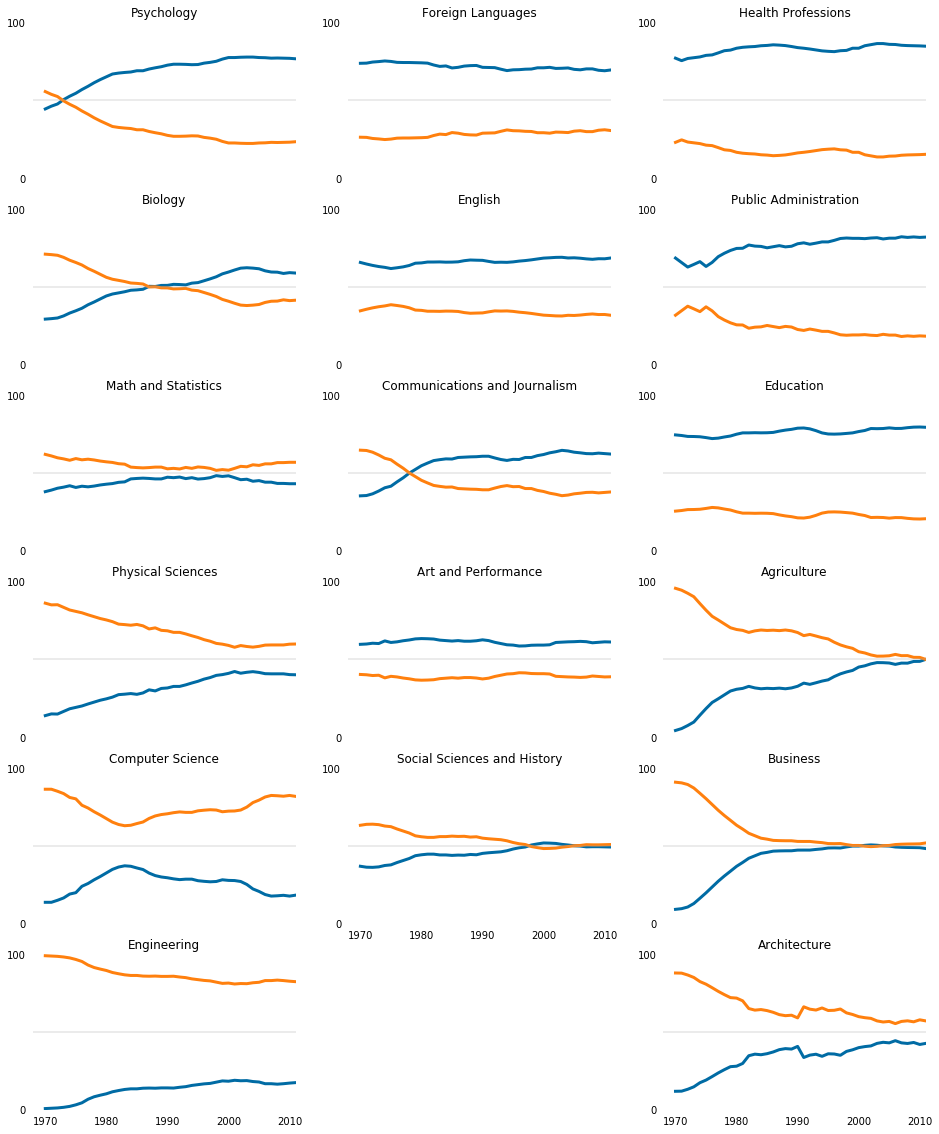

In [2]:
fig = plt.figure(figsize=(16, 20))
# 15
range_list_len = len(lib_arts_cats) + len(other_cats) + len(stem_cats)
# [0, 3, 6, 9, 12, 15]
first_sel_range = range(0, range_list_len+1, 3)
# [1, 4, 7, 10, 13, 16]
second_sel_range = range(1, range_list_len, 3)
# [2, 5, 8, 11, 14, 17]
third_sel_range = range(2, range_list_len+2, 3)
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
range_list = range(0, range_list_len+1)

def divide_chunks(l, n):
    """Method to devide list to chanks with len == n
    :param l: list to devide
    :param n: len of chank list
    
    :return: list of list (chanks)
    """
    result = []
    for i in range(0, len(l), n):
        result.append(l[i:i+n])
    return result

# list like [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14], [15, 16, 17]]
list_of_range_chanks = divide_chunks(range_list, 3)

year = women_degrees['Year']

for subplot in range_list:
    ax = fig.add_subplot(6, 3, subplot+1)
    bottom_line = False
    empty_sell = False
    for i in range(len(list_of_range_chanks)):
        if subplot in list_of_range_chanks[i]:
            index = i
    if subplot in list_of_range_chanks[-1]:
        bottom_line = True
    
    if subplot in first_sel_range:
        ax.plot(year, women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(year, 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
        ax.set_title(stem_cats[index])
    elif subplot in second_sel_range:
        try:
            ax.plot(year, women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(year, 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[index])
        except IndexError:
            pass
        if index+2 > len(lib_arts_cats):
            bottom_line = True
        if index+1 > len(lib_arts_cats):
            empty_sell = True
    elif subplot in third_sel_range:
        ax.set_title(other_cats[index])
        ax.plot(year, women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(year, 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3) 
    
    for spine in ax.spines.values():
            spine.set_visible(False)
    
    if bottom_line and not empty_sell:
        ax.tick_params(bottom=False, top=False, left=False, right=False)
    else:    
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if not empty_sell:
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0, 100])
    else:
        ax.set_yticks([])

plt.savefig("gender_degrees.png")
plt.show()